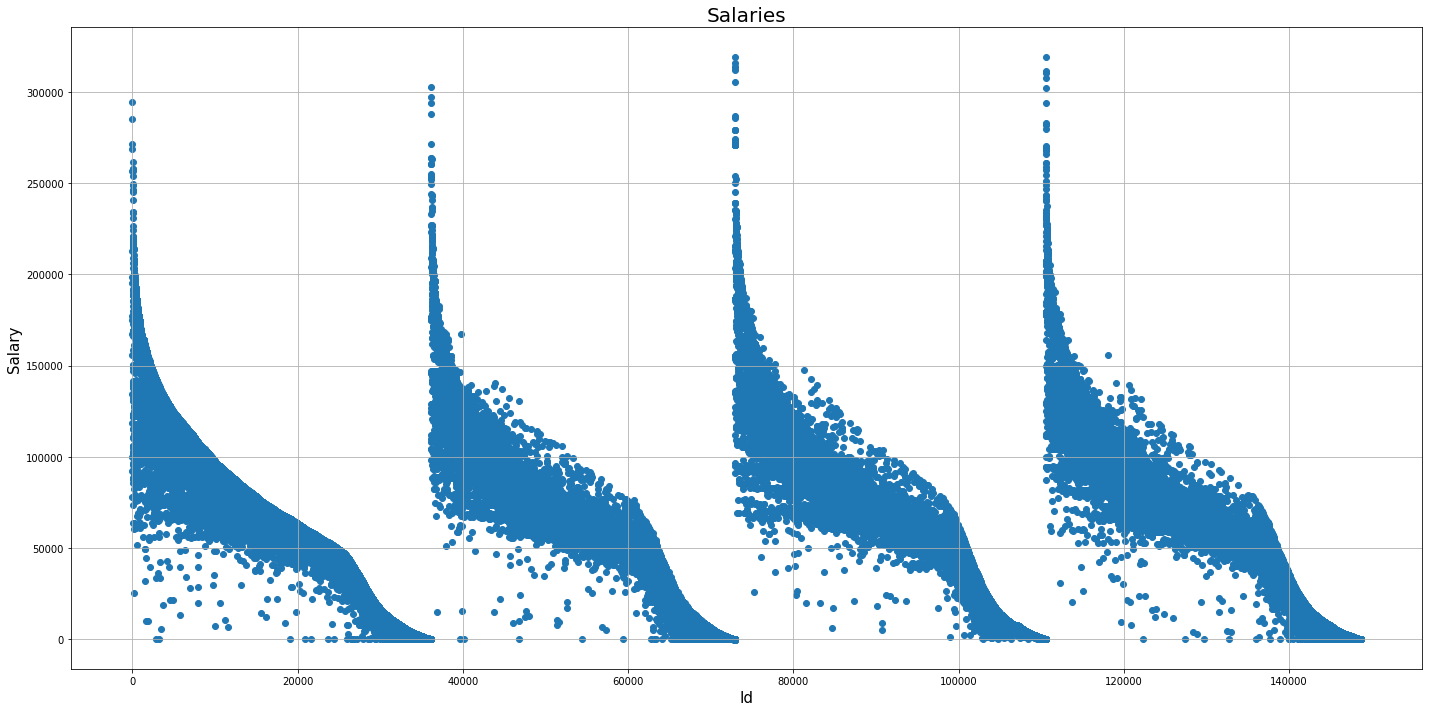

                        Id   BasePay  OvertimePay  OtherPay  Benefits  \
Id                1.000000 -0.204878    -0.081505 -0.100403 -0.348957   
BasePay          -0.204878  1.000000     0.266740  0.285655  0.918028   
OvertimePay      -0.081505  0.266740     1.000000  0.316592  0.301207   
OtherPay         -0.100403  0.285655     0.316592  1.000000  0.233178   
Benefits         -0.348957  0.918028     0.301207  0.233178  1.000000   
TotalPay         -0.211478  0.954494     0.504859  0.470496  0.884097   
TotalPayBenefits -0.092190  0.946595     0.467981  0.422341  0.930140   
Year              0.968171  0.033751     0.027887 -0.002499 -0.043136   
Notes                  NaN       NaN          NaN       NaN       NaN   
Status                 NaN       NaN          NaN       NaN       NaN   

                  TotalPay  TotalPayBenefits      Year  Notes  Status  
Id               -0.211478         -0.092190  0.968171    NaN     NaN  
BasePay           0.954494          0.946595  0.0337

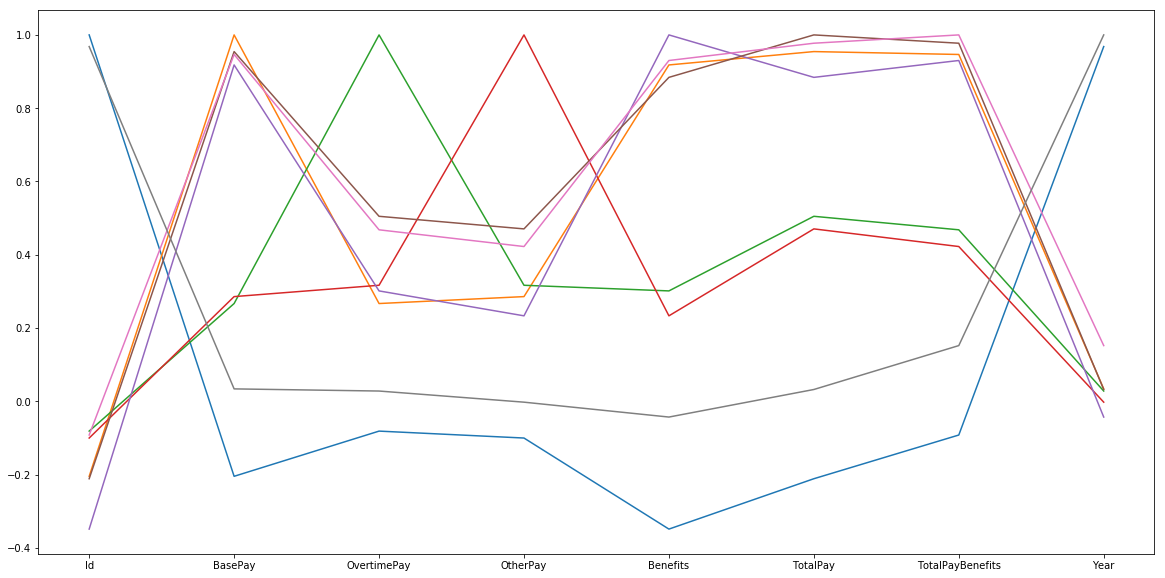

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import stats

salaries = pd.read_csv("Salaries.csv")
# year = salaries['Year'] == 2011
# salaries = salaries[year]

basepay = salaries['BasePay']
number = salaries['Id']
pay_mean = np.mean(basepay)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(number, basepay)

ax.set_xlabel('Id', fontsize=15)
ax.set_ylabel('Salary', fontsize=15)
ax.set_title('Salaries' , fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()

print(salaries.corr())

plt.figure(figsize=(20,10))
plt.plot(salaries.corr())

plt.show()

mean 2011:  63595.956516774524
mean 2012:  65436.40685742255
Shapiro-Wilk test for a normal distribution:  (0.948968768119812, 1.4545392580485277e-38)
Shapiro-Wilk test for a normal distribution:  (0.9375397562980652, 1.276162511460611e-41)


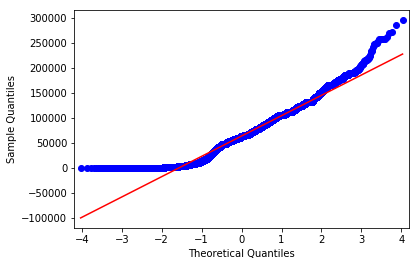

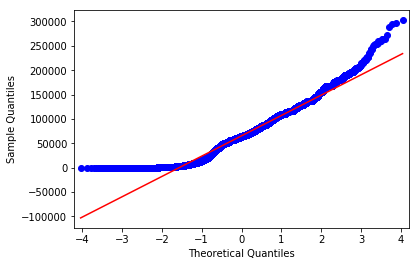

KstestResult(statistic=0.058429597140425706, pvalue=1.1910214259256156e-107)
KstestResult(statistic=0.058357909158440704, pvalue=3.493810240394685e-109)


In [69]:
import statsmodels.api as sm
import pylab

year2011 = salaries['Year'] == 2011
year2012 = salaries['Year'] == 2012
salaries2011 = salaries[year2011]
salaries2012 = salaries[year2012]
basepay2011 = salaries2011['BasePay']
basepay2012 = salaries2012['BasePay']

m2011 = np.mean(basepay2011)
m2012 = np.mean(basepay2012)
print('mean 2011: ',m2011)
print('mean 2012: ',m2012)

st2011 = np.std(basepay2011)
st2012 = np.std(basepay2012)

print('Shapiro-Wilk test for a normal distribution: ',stats.shapiro(basepay2011.head(5000)))
print('Shapiro-Wilk test for a normal distribution: ',stats.shapiro(basepay2012.head(5000)))

sm.qqplot(basepay2011, loc = m2011, scale = 3, line='s')
sm.qqplot(basepay2012, loc = m2012, scale = 3, line='s')
pylab.show()

print(stats.kstest(basepay2011, 'norm', args=(m2011, st2011)))
print(stats.kstest(basepay2012, 'norm', args=(m2012, st2012)))


In [70]:
anderson2011 = stats.anderson(basepay2011, dist='norm')
anderson2012 = stats.anderson(basepay2012, dist='norm')

print('Anderson test for a normal distribution: ',anderson2011)
print('Andreson test for a normal distribution: ',anderson2011)

Anderson test for a normal distribution:  AndersonResult(statistic=191.71574196177244, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Andreson test for a normal distribution:  AndersonResult(statistic=191.71574196177244, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
